<a href="https://colab.research.google.com/github/alpandialpandi/TraveGuide/blob/main/model_recommendation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recomended System for Tourism Destination Based on User Rating**

## **Import library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

## **Load the dataset**

In [ ]:
from google.colab import files
file = files.upload()

Saving tourism_rating.csv to tourism_rating.csv
Saving tourism_with_id.csv to tourism_with_id.csv


In [ ]:
rating=pd.read_csv("tourism_rating.csv")
destination=pd.read_csv("tourism_with_id.csv")

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


## **Data exploration**

In [ ]:
rating.head()

In [ ]:
destination.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [ ]:
print(rating.shape)
print(rating.User_Id.nunique())
print(rating.Place_Id.nunique())
rating.isna().sum()

(10000, 3)
300
437


User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

## **Split the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(rating, test_size=0.2, random_state=1)
print(f"Shape of train data: {Xtrain.shape}")
print(f"Shape of test data: {Xtest.shape}")

Shape of train data: (8000, 3)
Shape of test data: (2000, 3)


## **Create the Model**

In [ ]:
#Get the number of unique entities in books and users columns
nuser_id = rating.User_Id.nunique()
nplace_id = rating.Place_Id.nunique()

In [ ]:
#user input network
input_user = tf.keras.layers.Input(shape=[1], name="User-Input")
embed_user = tf.keras.layers.Embedding(nuser_id + 1,15,name="User-Embedding")(input_user)
user_out = tf.keras.layers.Flatten(name="Flatten-User")(embed_user)

#place input network
input_place = tf.keras.layers.Input(shape=[1],name="Place-Input")
embed_place = tf.keras.layers.Embedding(nplace_id + 1,15,name="Place-Embedding")(input_place)
place_out = tf.keras.layers.Flatten(name="Flatten-Place")(embed_place)

conc_layer = tf.keras.layers.Concatenate()([user_out, place_out])
fc1 = tf.keras.layers.Dense(128, activation='relu')(conc_layer)
fc2 = tf.keras.layers.Dense(64, activation='relu')(fc1)
x_out = x = tf.keras.layers.Dense(1, activation='relu')(fc2)
model = tf.keras.Model([input_user, input_place], x_out)

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 User-Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Place-Input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 15)        4515        ['User-Input[0][0]']             
                                                                                                  
 Place-Embedding (Embedding)    (None, 1, 15)        6570        ['Place-Input[0][0]']            
                                                                                              

## **Train the Model**

In [ ]:
hist = model.fit([Xtrain.User_Id, Xtrain.Place_Id], Xtrain.Place_Ratings,
                 epochs=20,
                 verbose=1
                 )

Epoch 1/20
250/250 [==============================] - 2s 3ms/step - loss: 2.9308
Epoch 2/20
250/250 [==============================] - 1s 2ms/step - loss: 1.8710
Epoch 3/20
250/250 [==============================] - 1s 2ms/step - loss: 1.8297
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 1.8095
Epoch 5/20
250/250 [==============================] - 1s 4ms/step - loss: 1.7909
Epoch 6/20
250/250 [==============================] - 1s 4ms/step - loss: 1.7743
Epoch 7/20
250/250 [==============================] - 1s 4ms/step - loss: 1.7392
Epoch 8/20
250/250 [==============================] - 1s 3ms/step - loss: 1.6759
Epoch 9/20
250/250 [==============================] - 1s 2ms/step - loss: 1.5549
Epoch 10/20
250/250 [==============================] - 1s 2ms/step - loss: 1.4375
Epoch 11/20
250/250 [==============================] - 1s 2ms/step - loss: 1.2868
Epoch 12/20
250/250 [==============================] - 1s 2ms/step - loss: 1.1800
Epoch 13/20
250/250 [====

## **visualize the training model**

Text(0, 0.5, 'Training Error')

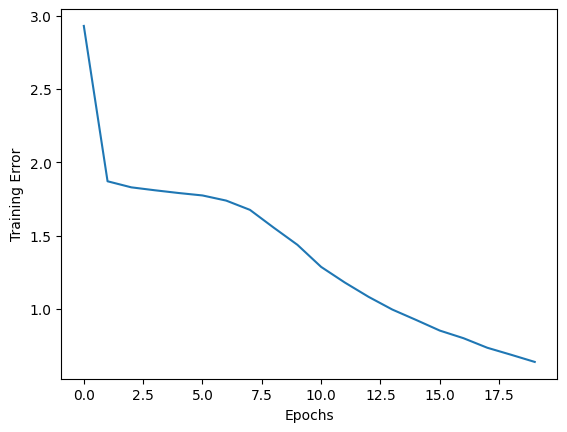

In [ ]:
plt.plot(hist.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

## **Evaluate the model**

In [ ]:
model.evaluate([Xtest.User_Id, Xtest.Place_Id], Xtest.Place_Ratings)

63/63 [==============================] - 1s 3ms/step - loss: 3.1679


3.167867660522461

## **Convert the Model to tflite**

### Saved the model to .h5 format

In [ ]:
tf.saved_model.save(model, 'recommendation_rating_model.h5')

### convert the .h5 to .tflite format

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("/content/recommendation_rating_model.h5") # path to the SavedModel directory
tflite_model = converter.convert()

In [ ]:
open("recommendation_rating_model.tflite","wb").write(tflite_model)

97052

## **Convert the model to json with tfjs**

### saved the model to .h5 format

In [ ]:
model.save('recommendation_rating_model.h5')

### convert the .h5 format to JSON with tfjs

In [ ]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras '/content/recommendation_rating_model.h5' '/content/recommendation_rating_model'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

2023-06-12 15:46:14.066686: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## **Making a recommendation**

### Making recommendation for user 1

In [ ]:
place_data = np.array(list(set(.Place_Id)))
user = np.array([1 for i in range(len(place_data))])

pred = model.predict([user, place_data])
pred = pred.reshape(-1) #reshape to single dimension
pred_ids = (-pred).argsort()[0:5]
pred_ids

14/14 [==============================] - 0s 2ms/step


array([209, 138, 314, 124, 386])

### Show the result of the recommended system

In [ ]:
destination.iloc[pred_ids]